# Lesson 22: More plotting with Matplotlib

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT). The retinal spiking data set if restricted. Please send inquiries to Justin Bois at `bois at caltech dot edu`.

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l22_more_matplotlib.ipynb).*

In [11]:
# NumPy, of course
import numpy as np
import scipy.special

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

## Plotting $x, y$ data

We have seen how to plot histograms, but we so often need to plot $x,y$ data.  This is also easy to do. Let's start by making a plot of a mathematical function. This also allows us to see how to make plots of nice, smooth functions.

We will plot the [Airy disk](https://en.wikipedia.org/wiki/Airy_disk), which we encounter in biology when doing microscopy as the diffraction pattern of light passing through a pinhole. Here is a picture of the diffraction pattern from a laser (with the main peak overexposed).

![airy_disk.png](airy_disk.png)


The equation for the radial light intensity of an Airy disk is

\begin{align}
\frac{I(x)}{I_0} = 4 \left(\frac{J_1(x)}{x}\right)^2,
\end{align}

where $I_0$ is the maximum intensity (the intensity at the center of the image) and $x$ is the radial distance from the center. Here, $J_1(x)$ is the first order Bessel function of the first kind. Yeesh. How do we plot *that*?

Fortunately, SciPy has lots of special functions available. Specifically, `scipy.special.j1()` computes exactly what we are after! We pass in a NumPy array that has the values of $x$ we want to plot and then compute the $y$-values using the expression for the normalized intensity.

To plot a smooth curve, we just use the `np.linspace()` function with lots of points. Matplotlib will then connect the points with straight lines, which to the eye look like a smooth curve.  Let's try it. We'll use 400 points, which I find is a good rule of thumb for not-too-oscillating functions.

In [15]:
# The x-values we want
x = np.linspace(-15, 15, 400)

# The normalized intensity
norm_I = 4 * (scipy.special.j1(x) / x)**2

Now that we have the values we want to plot, we use `plt.plot()` to make the plots.

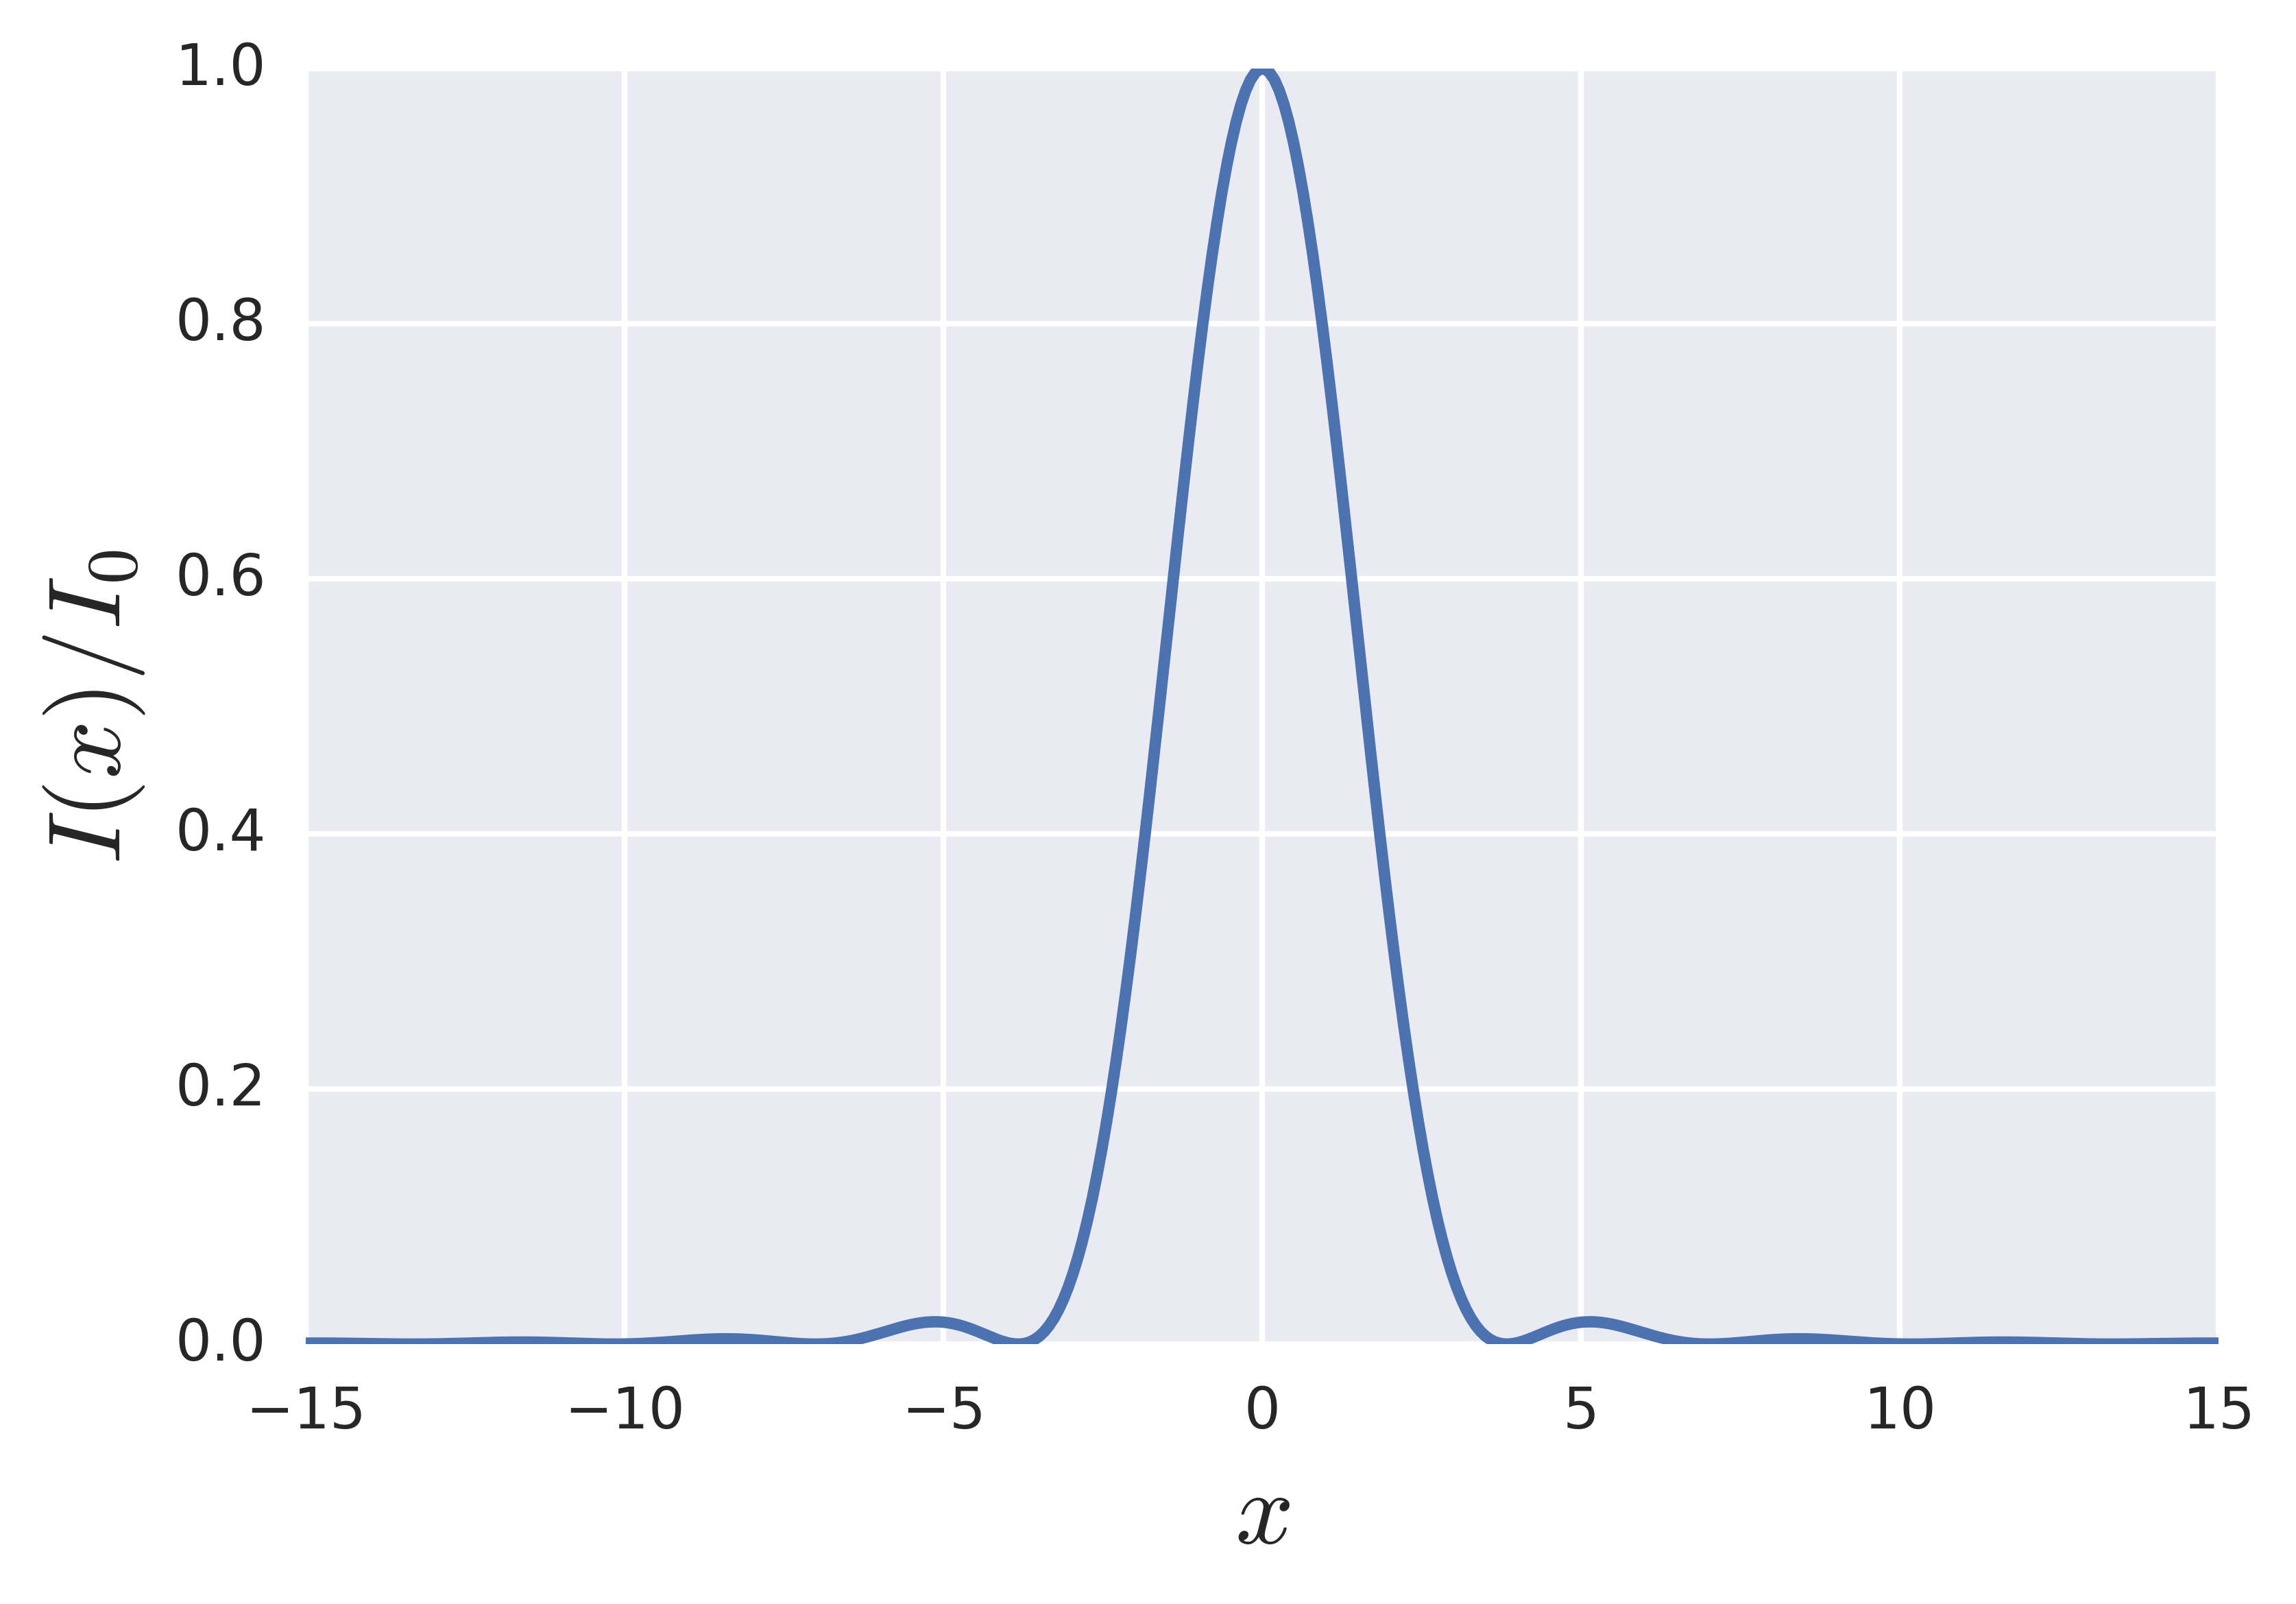

In [16]:
plt.plot(x, norm_I)
plt.xlabel('$x$')
plt.ylabel('$I(x)/I_0$')

By default, `plt.plot()` plots lines. We could also plot dots (which doesn't make sense here, but we'll show it just to see). We use some of `plt.plot()`'s many possible keyword arguments.

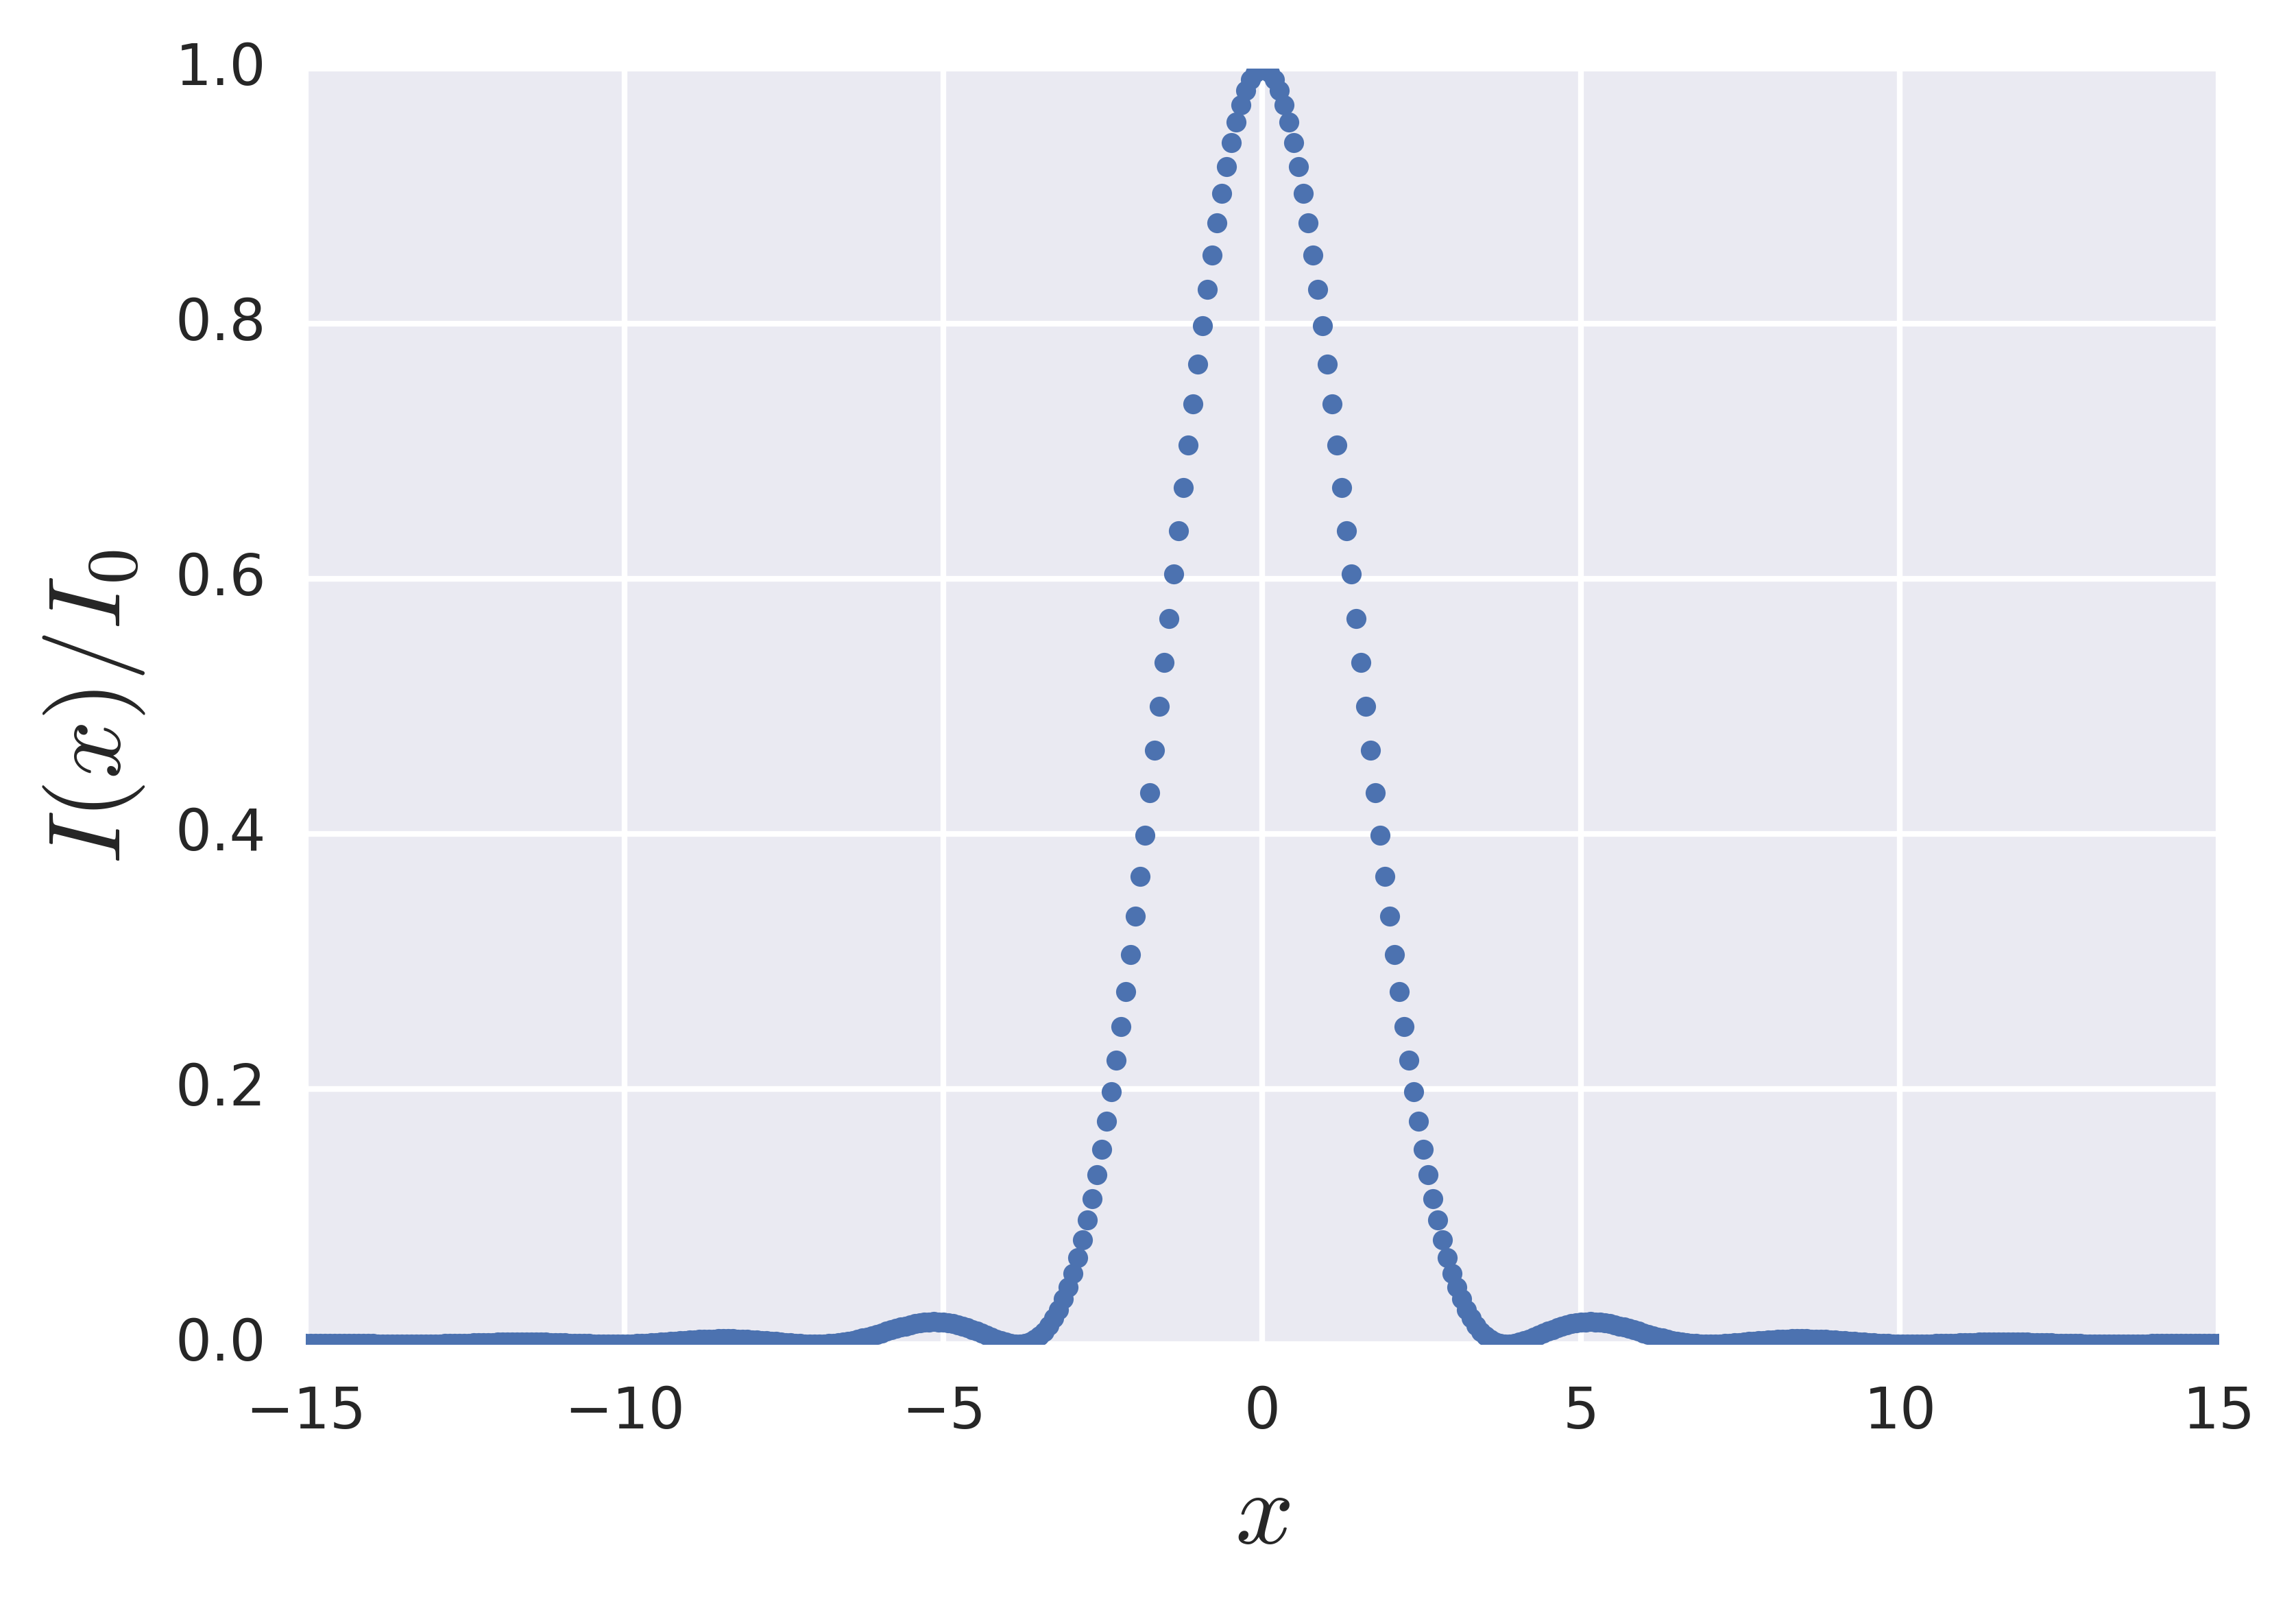

In [17]:
plt.plot(x, norm_I, marker='.', linestyle='none')
plt.xlabel('$x$')
plt.ylabel('$I(x)/I_0$')

Now, in both of these plots, some of the data are cut off by the edge of the plots. I like to have margins in my plots so this does not happen. We can set those using the `plt.margins()` function. I like to have a 2% buffer around my data.

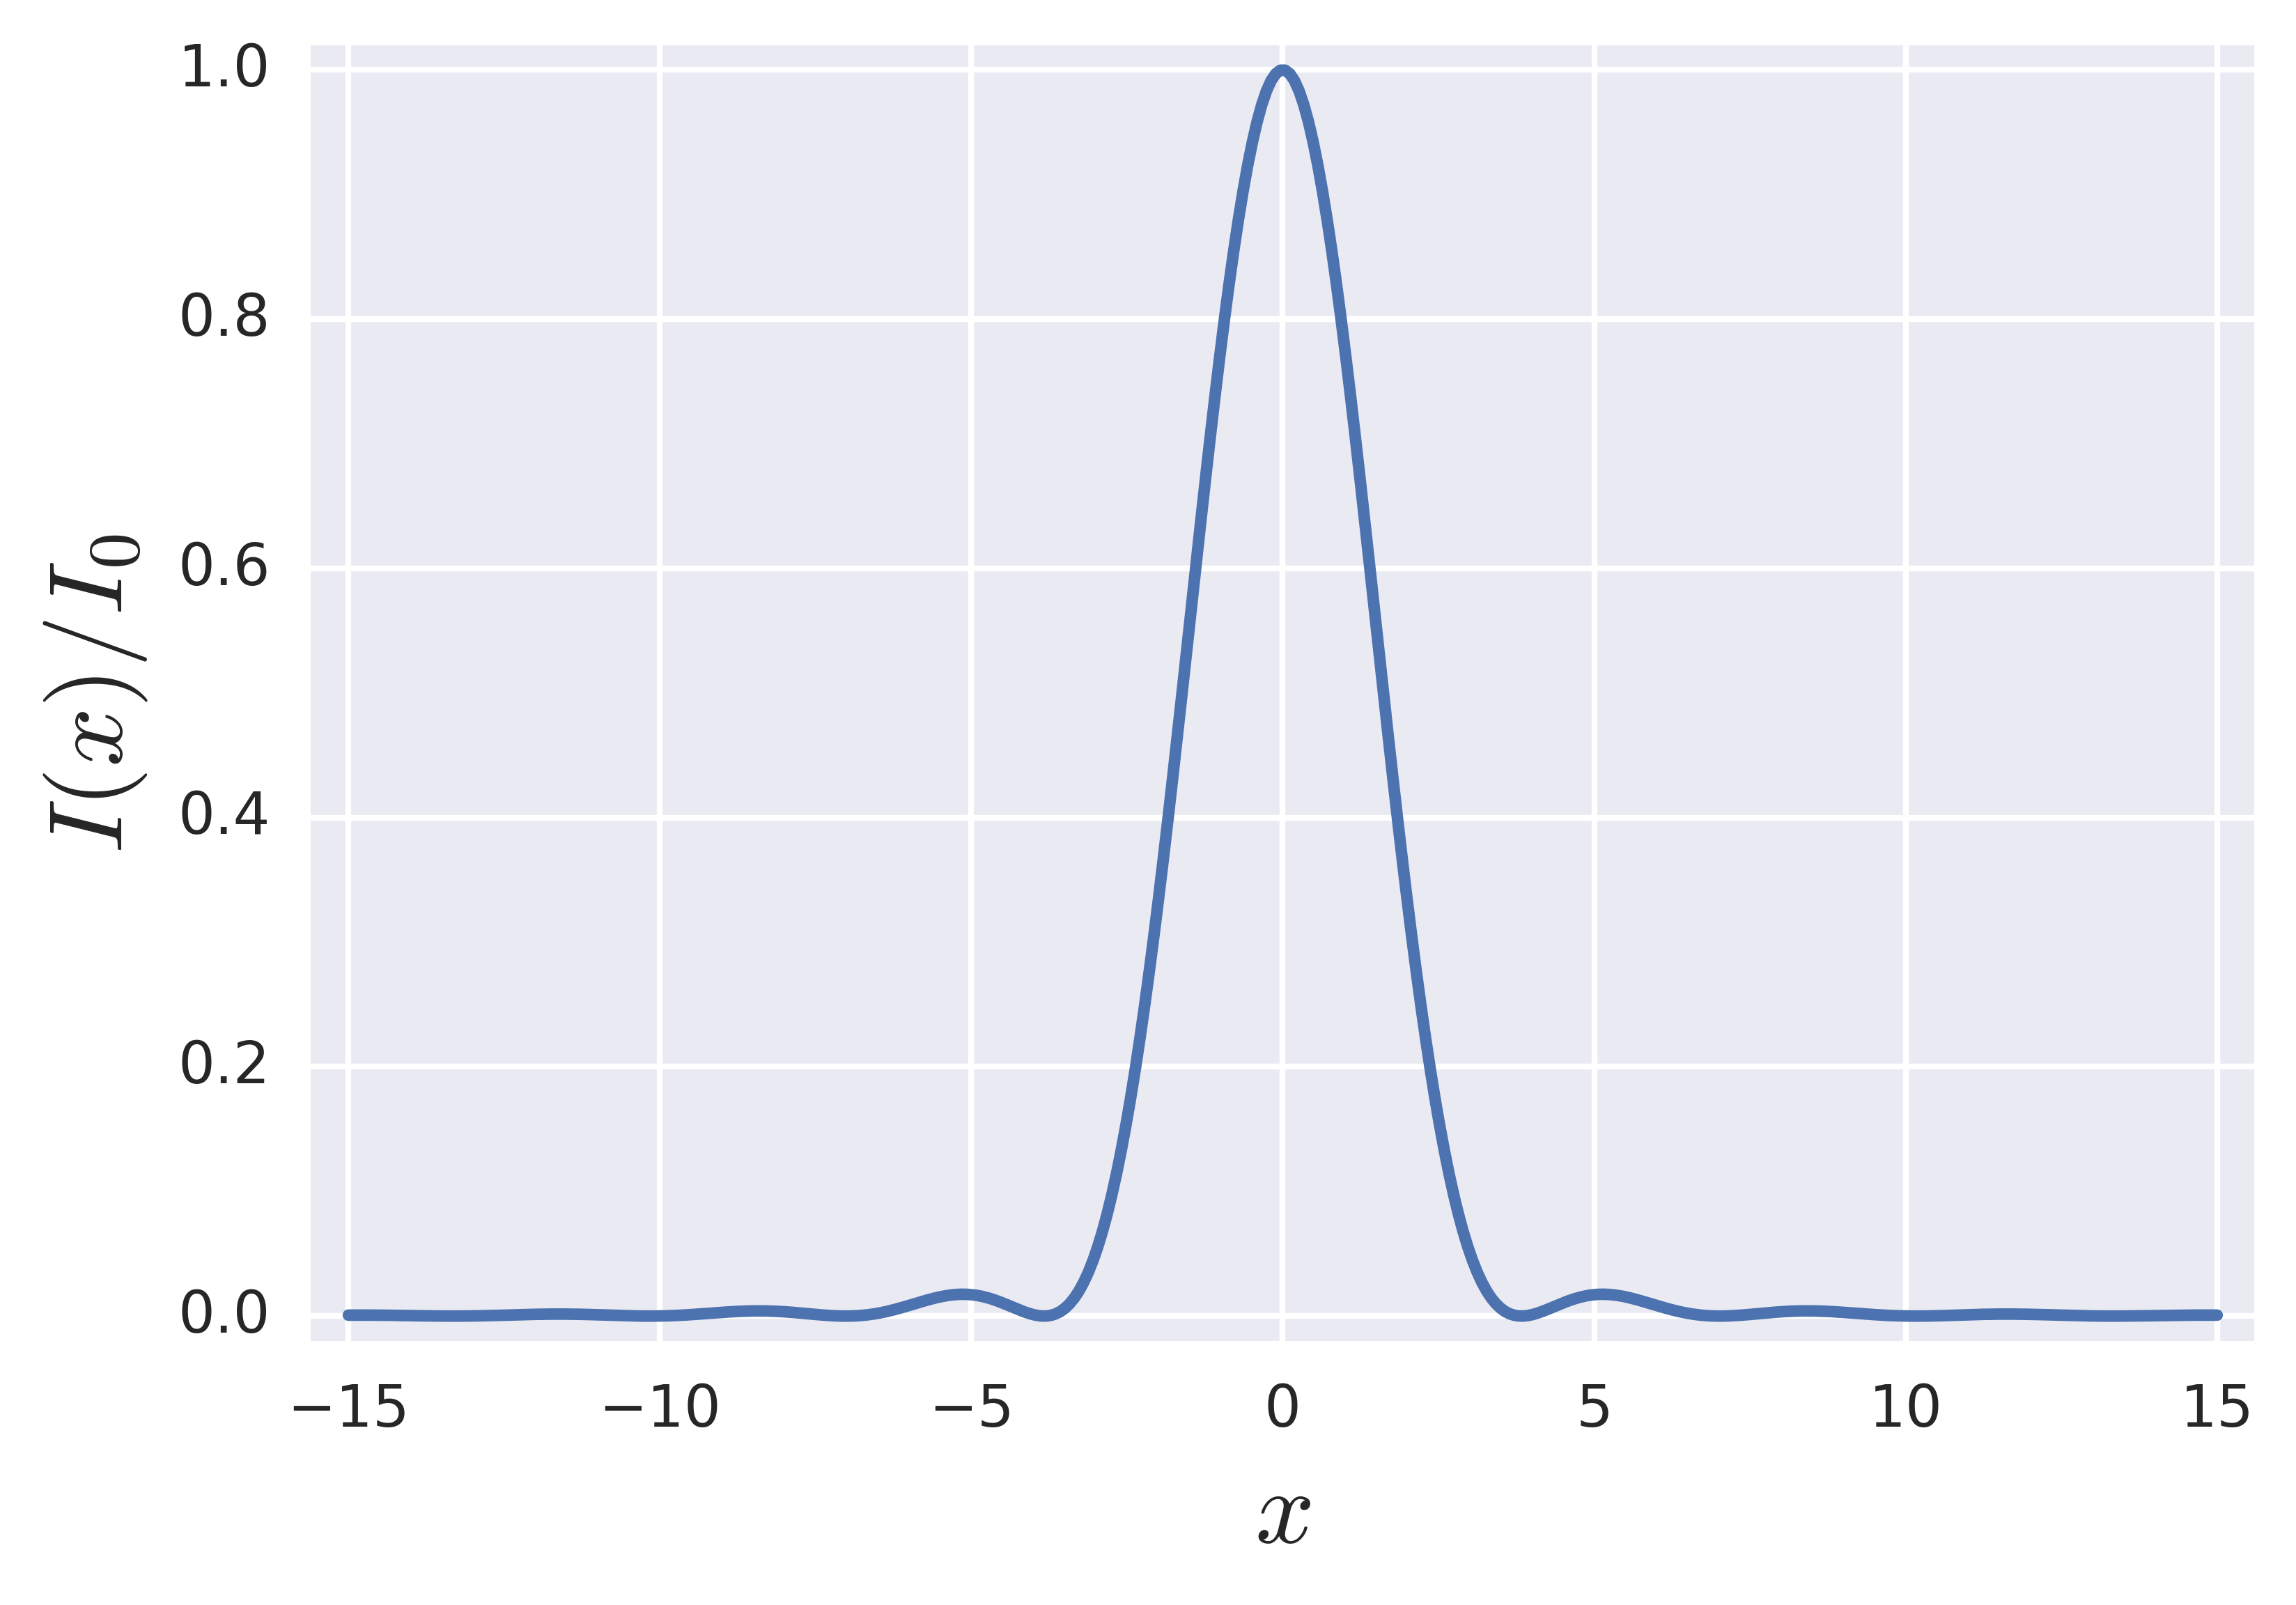

In [21]:
plt.plot(x, norm_I)
plt.margins(0.02)
plt.xlabel('$x$')
plt.ylabel('$I(x)/I_0$')

I think this is much better.

There is one detail I swept under the rug here. What happens if we compute the function for $x = 0$.

In [22]:
4 * (scipy.special.j1(0) / 0)**2

nan

We get a `RuntimeWarning` because we divided by zero. We know that

\begin{align}
\lim_{x\to 0} \frac{J_1(x)}{x} = \frac{1}{2},
\end{align}

so we could write a new function that checks if $x = 0$ and returns the appropriate limit for $x = 0$. In the $x$ array I constructed for the plot, we hopped over zero, so it was never evaluated.

## Plotting time series data

Now that we know how to make an $x$-$y$ plot, we can plot some real data. The file `~/git/data/retina_spikes.csv` contains data from Markus Meister's group, collected by graduate students Dawna Bagherian and Kyu Lee. They put electrodes in the retinal cells of a mouse and measured voltage. From the time trace of voltage, they can detect and characterize spiking events. The first column of the CSV file is the time in milliseconds (ms) of the voltage, and the second column is the voltage in units of microvolts (µV). The first two rows of the CSV file have text describing the data, so we will ignore those using the `skiprows` kwarg of `np.loadtxt()`. Since we also have two columns, we need to specify a delimiter using the `delimiter` kwarg, in this case `delimiter=','`.

In [24]:
# Load in data set
data = np.loadtxt('data/retina_spikes.csv', skiprows=2, delimiter=',')

# Slice out time and voltage
t = data[:,0]
V = data[:,1]

Now that we have the data, we know how to plot it using `plt.plot()`!

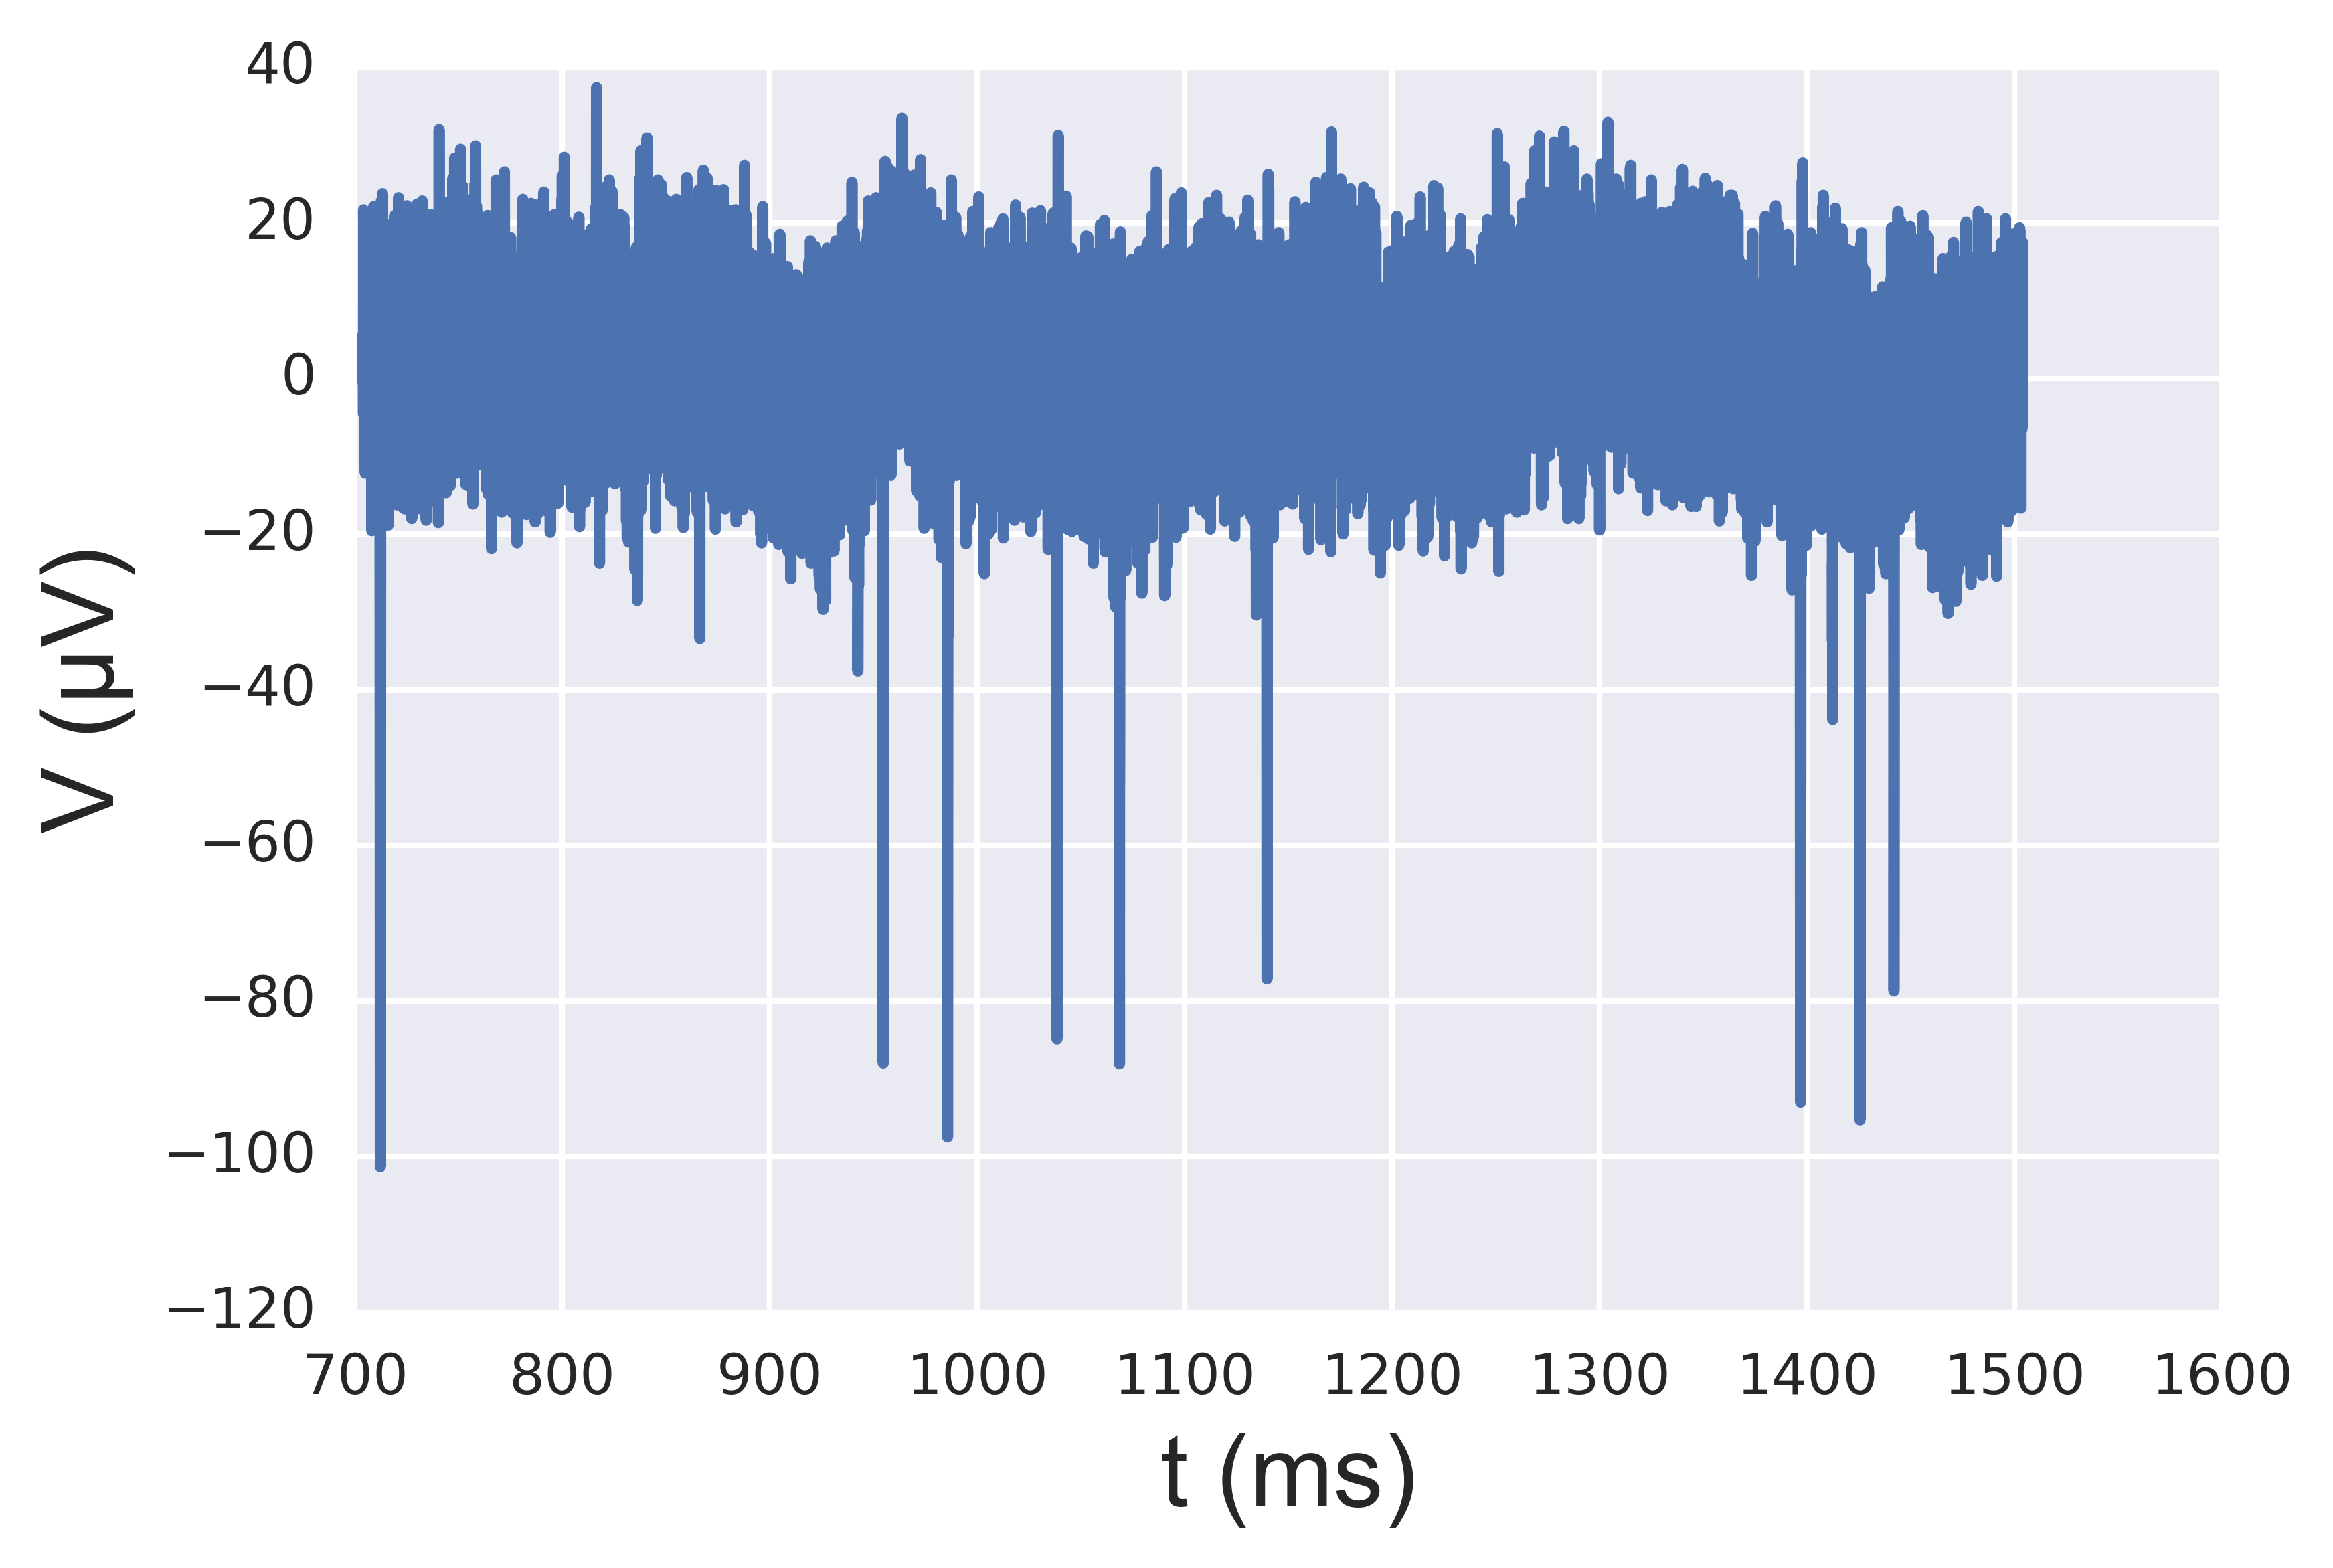

In [25]:
plt.plot(t, V)
plt.xlabel('t (ms)')
plt.ylabel('V (µV)')

That is a lot of data, and we can see the spikes corresponding to action potentials. We can zoom interactively to look at individual spikes, or we can set the limits of the $x$-axis using `plt.xlim()`.

(1395, 1400)

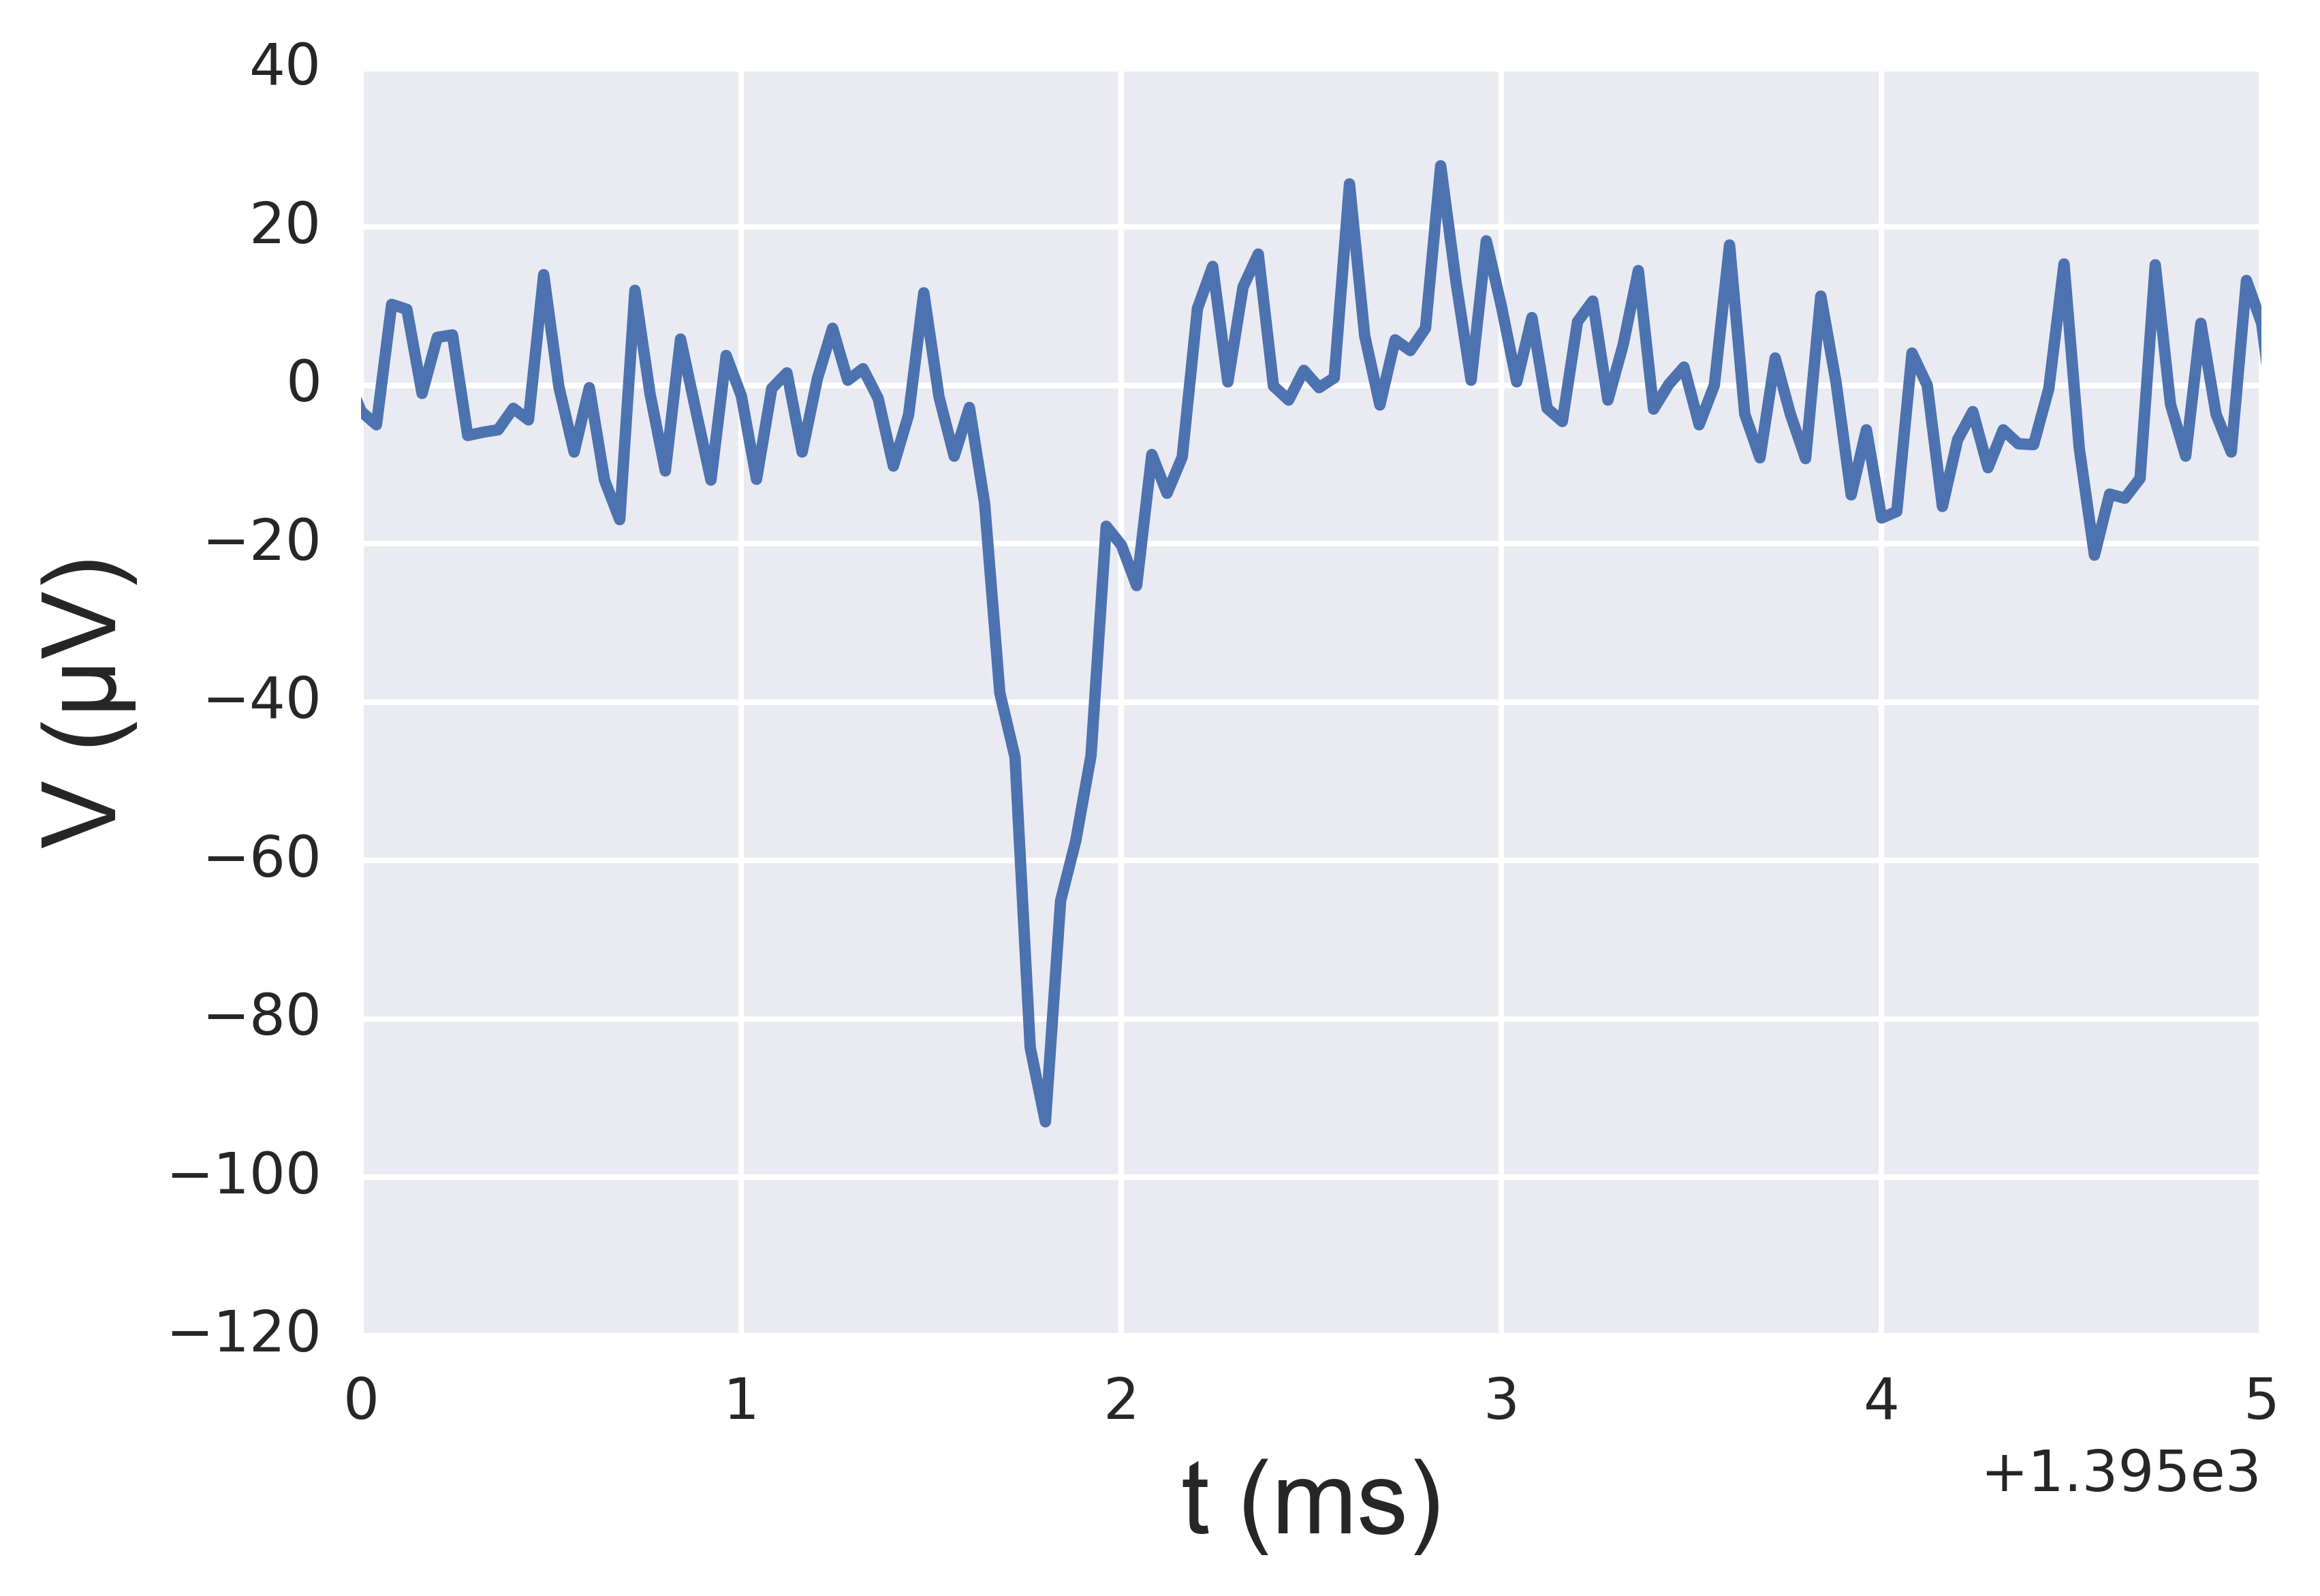

In [28]:
plt.plot(t, V)
plt.xlabel('t (ms)')
plt.ylabel('V (µV)')
plt.xlim(1395, 1400)

This gives a clearer picture of a spike. Now, you could use your new programming skills to find all the spikes in the signal automatically (which is what Dawna and Kyu do in their research). We won't cover that in our bootcamp, but you can take [BE/Bi 103](http://bebi103.caltech.edu/) if you want to learn about that.

Ok, now that you have the basics of plotting (and of Numpy), we'll spend the next two lessons practicing to sharpen your skills.